In [12]:
import pandas as pd

from helper_functions import read_data, get_impl_date
from definitions import data_path, show_plots, data_source_path, figures_path, \
    target_countries, fig_size, show_plots, save_figs, show_results, date_col, country_col
from plot_functions import plot_corr

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [13]:
def flatten(lst):
    return np.array([item for sublist in lst for item in sublist])

In [14]:
timeframe = 'm'
target_country = 'united kingdom'
target_var = 'co2'
diff_level, diff_order = 12, 2
date_start = '2004-01-01'

In [15]:
df_raw = read_data(data_path, f'total_{timeframe}')
df = df_raw.copy()
df

,country,date,year,month,co2,gdp,pop,co2_cap,gdp_cap
0,austria,2000-01-01,2000,1,9.726928e+09,2.309478e+11,8.003000e+09,1.215410,28.857653
1,austria,2000-02-01,2000,2,8.532685e+09,2.321217e+11,8.004700e+09,1.065959,28.998180
2,austria,2000-03-01,2000,3,8.134567e+09,2.332957e+11,8.006400e+09,1.016008,29.138647
3,austria,2000-04-01,2000,4,6.546738e+09,2.344696e+11,8.008100e+09,0.817514,29.279055
4,austria,2000-05-01,2000,5,5.603262e+09,2.352176e+11,8.010100e+09,0.699525,29.365122
...,...,...,...,...,...,...,...,...,...
4517,united kingdom,2019-06-01,2019,6,2.864851e+10,3.302814e+12,6.684433e+10,0.428585,49.410534
4518,united kingdom,2019-07-01,2019,7,2.872032e+10,3.322513e+12,6.686800e+10,0.429508,49.687638
4519,united kingdom,2019-08-01,2019,8,2.809851e+10,3.338771e+12,6.689167e+10,0.420060,49.913109
4520,united kingdom,2019-09-01,2019,9,3.070698e+10,3.355029e+12,6.691533e+10,0.458893,50.138420


In [16]:
df_stat_raw = read_data(data_path, f'total_{timeframe}_stat')
df_stat = df_stat_raw.copy()
df_stat

,country,date,year,month,co2,gdp,pop,co2_cap,gdp_cap
0,austria,2001-01-01,2001,1,-0.019138,0.029099,-99999.0,-0.022344,0.025893
1,austria,2001-02-01,2001,2,0.039611,0.023861,-99999.0,0.036264,0.020514
2,austria,2001-03-01,2001,3,0.022160,0.018648,-99999.0,0.018673,0.015161
3,austria,2001-04-01,2001,4,0.119718,0.013460,-99999.0,0.116090,0.009833
4,austria,2001-05-01,2001,5,0.024326,0.011493,-99999.0,0.020558,0.007726
...,...,...,...,...,...,...,...,...,...
4301,united kingdom,2019-06-01,2019,6,-0.017357,-99999.000000,-99999.0,-0.022581,-99999.000000
4302,united kingdom,2019-07-01,2019,7,-0.034553,-99999.000000,-99999.0,-0.039681,-99999.000000
4303,united kingdom,2019-08-01,2019,8,-0.020662,-99999.000000,-99999.0,-0.025693,-99999.000000
4304,united kingdom,2019-09-01,2019,9,-0.005156,-99999.000000,-99999.0,-0.010090,-99999.000000


<AxesSubplot:xlabel='date'>

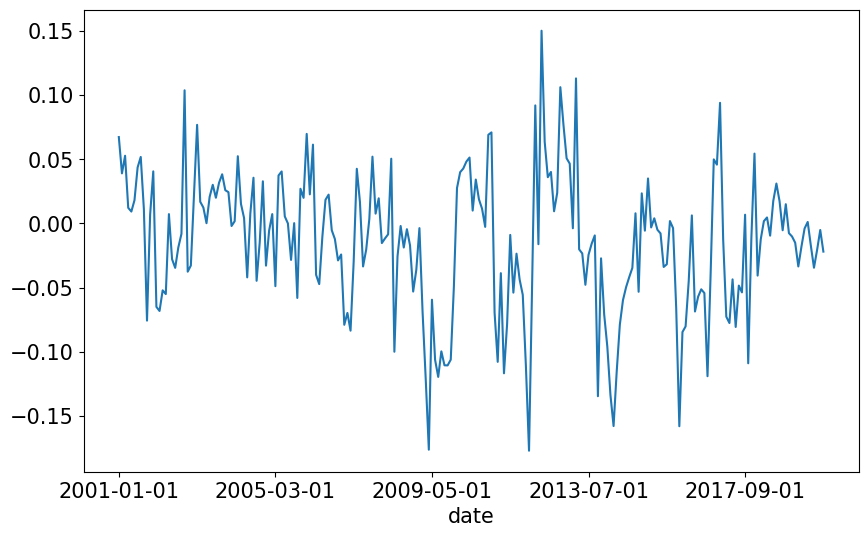

In [17]:
target_diff = df_stat[df_stat[country_col] == target_country].set_index(date_col)[target_var]
target_diff.plot(figsize=fig_size)

<AxesSubplot:xlabel='date'>

<Figure size 1000x600 with 0 Axes>

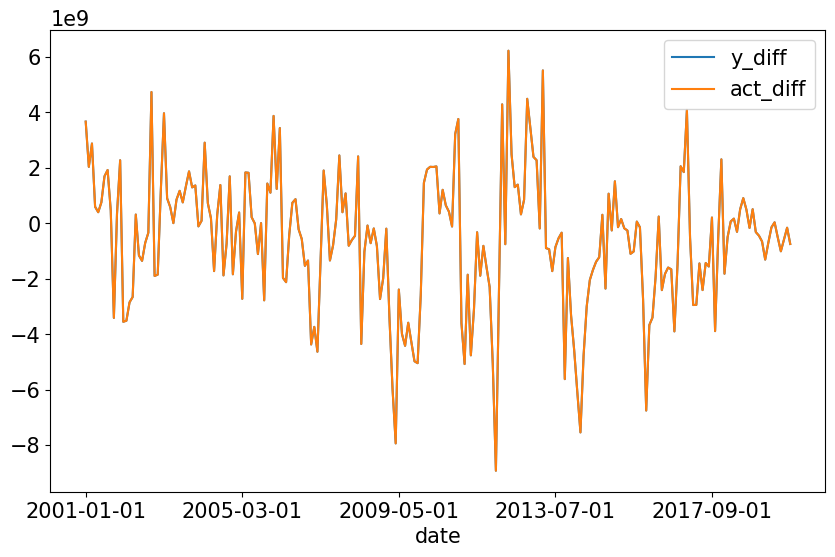

In [7]:
# orig = df_stat[(df_stat['country']==target_country) & (df_stat['date']>=date_start)].set_index('date')[target_var]
# orig.plot(figsize=fig_size)

target_diff = df_stat[df_stat[country_col] == target_country].set_index(date_col)[target_var]
y_diff = np.array(target_diff).reshape(-1, 1)
y_diff = flatten(y_diff)
plt.figure(figsize=fig_size)

act_pred_diff = pd.read_csv(f'output/tables/results/{target_country}/{target_country}_act_pred_diff.csv')
act_pred_diff
act_diff = act_pred_diff.set_index('date')['act']

compare = pd.DataFrame(list(zip(y_diff, act_diff)),
                       columns=['y_diff', 'act_diff']).set_index(target_diff.index)

compare.plot(figsize=fig_size)

                     act       act_new
date                                  
2004-01-01  5.394055e+10  5.394055e+10
2004-02-01  5.379037e+10  5.379037e+10
2004-03-01  5.703766e+10  5.703766e+10
2004-04-01  4.822989e+10  4.822989e+10
2004-05-01  4.411408e+10  4.411408e+10
2004-06-01  4.011501e+10  4.011501e+10
2004-07-01  3.987769e+10  3.987769e+10
2004-08-01  3.952822e+10  3.952822e+10
2004-09-01  4.105601e+10  4.105601e+10
2004-10-01  4.921663e+10  4.921663e+10
2004-11-01  5.248549e+10  5.248549e+10
2004-12-01  5.493582e+10  5.493582e+10
2005-01-01  5.364080e+10  5.364080e+10
2005-02-01  5.418064e+10  5.418064e+10
2005-03-01  5.431284e+10  5.431284e+10
2005-04-01  5.006530e+10  5.006530e+10
2005-05-01  4.593719e+10  4.593719e+10
2005-06-01  4.033429e+10  4.033429e+10
2005-07-01  3.987491e+10  3.987491e+10
2005-08-01  3.841934e+10  3.841934e+10
2005-09-01  4.106385e+10  4.106385e+10
2005-10-01  4.643750e+10  4.643750e+10
2005-11-01  5.392164e+10  5.392164e+10
2005-12-01  5.604056e+10 

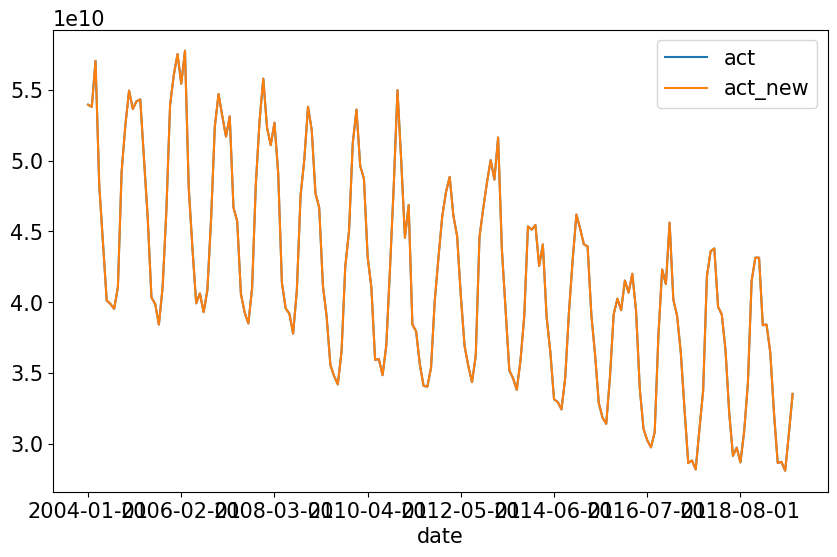

In [8]:
col = 'act'

orig = df[(df['country']==target_country) & (df['date']>=date_start)].set_index('date')[target_var]

orig_log = np.log(orig)

orig_log_diff1 = orig_log.diff(diff_level)

orig_log_diff2 = orig_log_diff1.diff(diff_level)

orig_log_diff2_stand = flatten(SS.fit_transform(np.array(orig_log_diff2).reshape(-1, 1))).reshape(-1, 1)

orig_log_diff2_new = flatten(SS.inverse_transform(orig_log_diff2_stand))

orig_log_diff1_new = np.zeros(len(orig_log_diff1))
orig_log_diff1_new[diff_level:2*diff_level] = orig_log_diff1[diff_level:2*diff_level]
for i in range(2*diff_level, len(orig_log_diff1)):
    orig_log_diff1_new[i] = orig_log_diff1_new[i-diff_level] + orig_log_diff2_new[i]

orig_log_new = np.zeros(len(orig_log))
orig_log_new[:diff_level] = orig_log[:diff_level]
for i in range(diff_level, len(orig_log)):
    orig_log_new[i] = orig_log_new[i-diff_level] + orig_log_diff1_new[i]

orig_new = np.exp(orig_log_new)
    
    
    
    
    
# test = orig_log_diff2_stand
test = pd.DataFrame(list(zip(orig, orig_new)),
                                 columns=[col, f'{col}_new']).set_index(orig.index)
print(test[:50])
if type(test) in [list, np.ndarray]:
    plt.figure(figsize=fig_size)
    plt.plot(test)
else:
    test.plot(figsize=fig_size)

C:\Users\Bas\AppData\Local\Temp\ipykernel_7868\4012741626.py:25: RuntimeWarning: overflow encountered in exp
  orig_new = np.exp(orig_log_new)


                pred      pred_new
date                              
2004-01-01       NaN  5.391249e+08
2004-02-01       NaN  3.824007e+08
2004-03-01       NaN  8.548375e+08
2004-04-01       NaN  1.974901e+09
2004-05-01       NaN  1.013825e+09
...              ...           ...
2019-06-01 -0.034837  2.133223e+08
2019-07-01 -0.065623 -3.330689e+08
2019-08-01 -0.038079 -1.287114e+08
2019-09-01  0.000189 -8.924557e+08
2019-10-01 -0.036954  9.546044e+08

[190 rows x 2 columns]


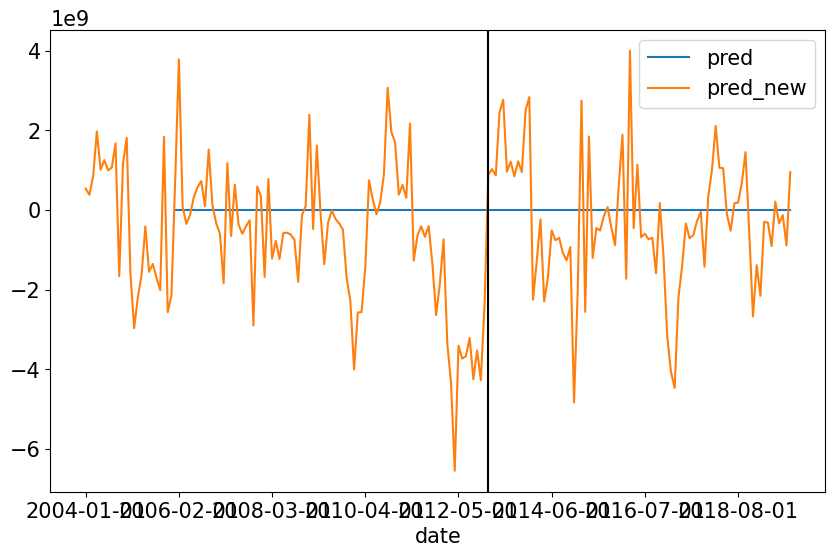

In [10]:
col = 'pred'

orig = df[(df['country']==target_country) & (df['date']>=date_start)].set_index('date')[target_var]

orig_log = np.log(orig)

orig_log_diff1 = orig_log.diff(diff_level)

orig_log_diff2 = orig_log_diff1.diff(diff_level)

orig_log_diff2_stand = flatten(np.array(SS.fit_transform(np.array(orig_log_diff2).reshape(-1, 1))))

orig_log_diff2_new = flatten(np.array(act_pred_diff[col]).reshape(-1, 1)) #PRED ==================================

orig_log_diff1_new = np.zeros(len(orig_log_diff1))
orig_log_diff1_new[diff_level:2*diff_level] = orig_log_diff1[diff_level:2*diff_level]
for i in range(2*diff_level, len(orig_log_diff1)):
    orig_log_diff1_new[i] = orig_log_diff1_new[i - diff_level] + orig_log_diff2_new[i]

orig_log_new = np.zeros(len(orig_log))
orig_log_new[:diff_level] = orig_log[:diff_level]
for i in range(diff_level, len(orig_log)):
    orig_log_new[i] = orig_log[i - diff_level] + orig_log_diff1_new[i]

orig_new = np.exp(orig_log_new)
    
    
    
    
    
# test = orig_log_new
test = pd.DataFrame(list(zip(orig_log_diff2, orig_log_diff2_new)),
                                 columns=[col, f'{col}_new']).set_index(orig.index)
print(test)
if type(test) in [list, np.ndarray]:
    plt.figure(figsize=fig_size)
    plt.axvline(x=list(test.index).index(get_impl_date(target_country)), c='black')
    plt.plot(test)
else:
    test.plot(figsize=fig_size)
    plt.axvline(x=list(test.index).index(get_impl_date(target_country)), c='black')

In [163]:
list(test.index)
list(test.index).index(get_impl_date(target_country))

108

In [77]:
# orig_log_diff2_stand = flatten(np.array(SS.fit_transform(np.array(orig_log_diff2).reshape(-1, 1))))

# orig_log_diff2_stand_new = np.array(act_pred_diff[col]).reshape(-1, 1) #PRED ==================================

# orig_log_diff2_new = flatten(SS.inverse_transform(orig_log_diff2_stand_new).reshape(-1, 1))
# # orig_log_diff2_new = np.array(flatten(orig_log_diff2_stand))

# orig_log_diff1_new = np.zeros(len(orig_log_diff1))
# orig_log_diff1_new[diff_level:2*diff_level] = orig_log_diff1[diff_level:2*diff_level]
# for i in range(2*diff_level, len(orig_log_diff1)):
#     orig_log_diff1_new[i] = orig_log_diff1_new[i-diff_level] + orig_log_diff2_new[i]

# orig_log_new = np.zeros(len(orig_log))
# orig_log_new[:diff_level] = orig_log[:diff_level]
# for i in range(diff_level, len(orig_log)):
#     orig_log_new[i] = orig_log_new[i-diff_level] + orig_log_diff1_new[i]
    
# orig_new = np.exp(orig_log_new)
    
    
# # test = orig_log_diff2
# test = pd.DataFrame(list(zip(orig_log_diff2_stand, orig_log_diff2_stand_new)),
#                                  columns=[col, f'{col}_new']).set_index(orig.index)
# print(test[:50])
# if type(test) in [np.ndarray]:
#     plt.figure(figsize=fig_size)
#     plt.plot(test)
# else:
#     test.plot(figsize=fig_size)

In [63]:
# orig = df[(df['country']==target_country) & (df['date']>=date_start)].set_index('date')[target_var]

# orig = np.log(orig)

# orig = orig_log.diff(12).diff(12)

# orig = pd.DataFrame(SS.fit_transform(np.array(orig_log_diff2).reshape(-1, 1)), columns=[col])

# orig = pd.DataFrame(flatten(SS.inverse_transform(orig)))

# orig.plot(figsize=fig_size)